### MTN data Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

#Provide file path here on which the analysis to be done
#file2 = open("20220203170201_2214_GGSN.dat")
file2 = open("2022020317001_mtn_ggsn.dat")

#Creating pandas dataframe from the loaded data:
df = pd.read_csv(file2, header=None, delimiter="|")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(df.head(15))
#print("Dataframe Shape is:",df.shape)


#Feature Extraction and DATA NORMALIZATION (The extracted features representing as dataframe Columns):
normalize_df = pd.DataFrame({
    'Served_IMSI': df[1],
    'ggsnipaddress':df[2],
    'sgsnipaddress':df[3],
    'chargingid': df[4],
    'APN': df[5],
    'servedPDPaddress': df[7],
    'datavolume_GPRSUplink': df[10],
    'datavolume_GPRSDownlink': df[11],
    'changecondition': df[12],
    'RecordTime': df[14],
    'duration': df[15],
    'Cause_For_ReClosing': df[16],
    'ServedMSISDN':df[18],
    'ratType':df[21],
    'UserLocationInformation': df[22],
    'ratingGroup': df[24],
    'LAC': df[29],
    'IMEI': df[30]
})

#Taking out the decimal points from the feature "UserLocationInformation"
normalize_df['UserLocationInformation']= normalize_df['UserLocationInformation'].astype(str).apply(lambda x: x.replace('.0',''))

display(normalize_df.loc[:5])

,Served_IMSI,ggsnipaddress,sgsnipaddress,chargingid,APN,servedPDPaddress,datavolume_GPRSUplink,datavolume_GPRSDownlink,changecondition,RecordTime,duration,Cause_For_ReClosing,ServedMSISDN,ratType,UserLocationInformation,ratingGroup,LAC,IMEI
0,621300248160735,41.220.67.33,41.206.6.151,3160347431,web.gprs.mtnnigeria.net,10.165.28.106,9932,9932,qoSChange,20220203 165251,268,rATChange,2348160208331,1,621303098642059,192;99;1;464,30986,3.537881e+15
1,621300402578405,41.220.67.33,41.206.6.148,3896435895,web.gprs.mtnnigeria.net,10.176.193.181,2233533,2233533,recordClosure,20220203 164943,456,normalRelease,2348106845111,1,621301008226767,464,10082,3.516582e+15
2,621300208676457,41.220.67.33,197.210.210.4,3411156703,web.gprs.mtnnigeria.net,10.170.252.228,0,0,recordClosure,20220203 164218,901,normalRelease,2347063677719,6,621300050996977,NaN,13066,3.529071e+15
3,621300456668165,41.220.67.33,197.210.210.4,3314334355,web.gprs.mtnnigeria.net,2C0F:F5C0:0443:7336:5D02:2F26:08E1:B805,0,0,recordClosure,20220203 165713,6,normalRelease,2348066564643,6,621300169354993,NaN,23064,3.552235e+15
4,621300364761520,41.220.67.33,197.210.210.4,1623793871,web.gprs.mtnnigeria.net,2C0F:F5C0:0443:8498:D7B2:918B:1C12:67D1,0,0,recordClosure,20220203 165714,5,normalRelease,2349033739796,6,621300142616305,NaN,10368,3.536903e+15
5,621300340885913,41.220.67.33,197.210.210.4,2810849139,web.gprs.mtnnigeria.net,10.136.223.24,0,0,recordClosure,20220203 165719,0,normalRelease,2349063633940,6,621300032057073,NaN,20969,3.575790e+15


### Use Case 1: RAT Usage:

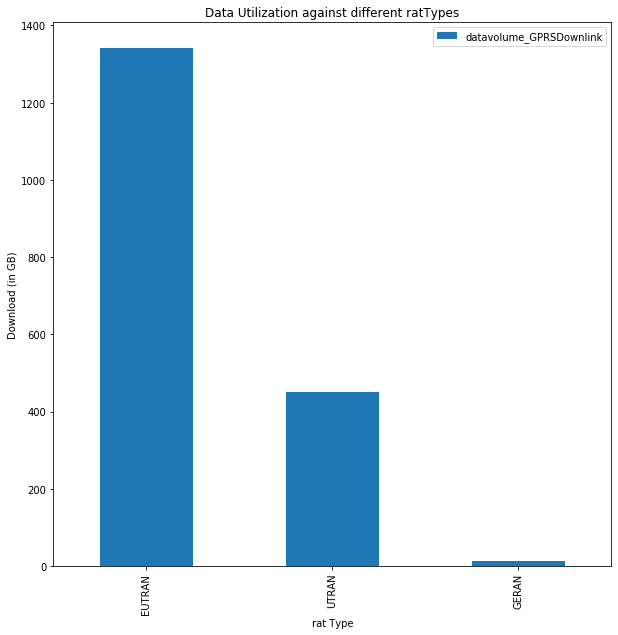

In [4]:
#Creating dataframe by applying groupby on required features:
df_rat = normalize_df.groupby(['ratType'])['datavolume_GPRSDownlink'].apply(lambda x : x.astype(int).sum())
#print(df_rat.head(5))
df_rat = df_rat.reset_index() #For flattening the index columns

#Sorting the Downloaded data in Descending order (Here highest comes at top) in GB
sorted_df_rat = df_rat.sort_values(["datavolume_GPRSDownlink"], ascending=False)
sorted_df_rat['datavolume_GPRSDownlink'] = sorted_df_rat['datavolume_GPRSDownlink'].div(1024*1024*1024).round(2)
#print(sorted_df_rat.head(5))

#RAT value mapping to corresponding RAT
sorted_df_rat.loc[sorted_df_rat['ratType'] == 6.0, 'ratType'] = 'EUTRAN'
sorted_df_rat.loc[sorted_df_rat['ratType'] == 1.0, 'ratType'] = 'UTRAN'
sorted_df_rat.loc[sorted_df_rat['ratType'] == 2.0, 'ratType'] = 'GERAN'

#Plotting the required Data:
plt.rcParams['figure.figsize']= [10,10]
sorted_df_rat.plot(x="ratType", y="datavolume_GPRSDownlink", kind="bar", title="Data Utilization against different ratTypes")
plt.xlabel("rat Type")
plt.ylabel("Download (in GB)")
plt.legend()
plt.show()

### Use Case 2: RAT wise Top-10 Consumers:

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


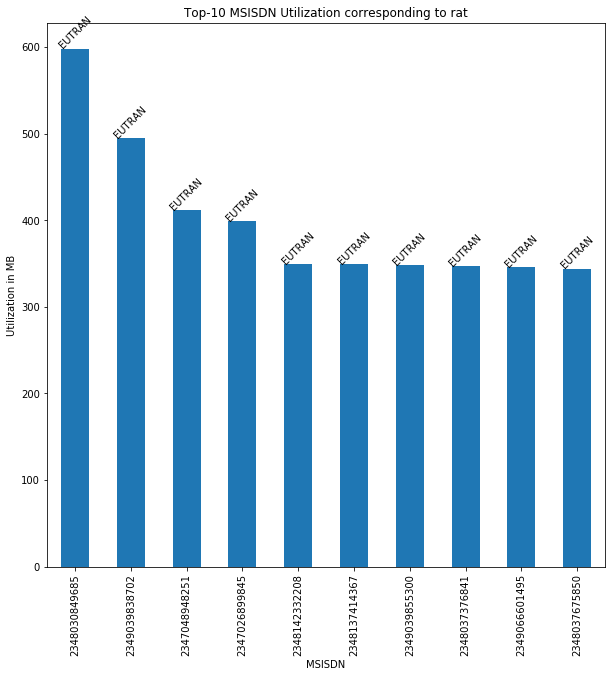

In [5]:
#Creating dataframe by applying groupby on required features:
df_rat_msisdn = normalize_df.groupby(['ServedMSISDN','ratType'])['datavolume_GPRSDownlink'].apply(lambda x : x.astype(float).sum())
df_rat_msisdn = df_rat_msisdn.reset_index() #For flattning the index columns

#Sorting the Downloaded data in Descending order (Here highest comes at top) in MB
df_rat_msisdn_sorted_top = df_rat_msisdn.sort_values(['datavolume_GPRSDownlink'], ascending=False)
df_rat_msisdn_sorted_top['datavolume_GPRSDownlink'] = df_rat_msisdn_sorted_top['datavolume_GPRSDownlink'].div(1024*1024).round(2)
df_rat_msisdn_sorted_top = df_rat_msisdn_sorted_top.round(0).astype({'ratType': int})
#print("Top Usage subscribers corresponding to ratType are: \n",df_rat_msisdn_sorted_top.head(10))

#RAT value mapping to corresponding RAT
df_rat_msisdn_sorted_top_10 = df_rat_msisdn_sorted_top.head(10)
df_rat_msisdn_sorted_top_10.loc[df_rat_msisdn_sorted_top_10['ratType'] == 6, 'ratType'] = 'EUTRAN'
df_rat_msisdn_sorted_top_10.loc[df_rat_msisdn_sorted_top_10['ratType'] == 1, 'ratType'] = 'UTRAN'
df_rat_msisdn_sorted_top_10.loc[df_rat_msisdn_sorted_top_10['ratType'] == 2, 'ratType'] = 'GERAN'


#Plotting the required Data:
plt.figure(figsize=(10,10))
ax = df_rat_msisdn_sorted_top_10['datavolume_GPRSDownlink'].plot(kind="bar")
ax.set_title("Top-10 MSISDN Utilization corresponding to rat")
ax.set_xlabel("MSISDN")
ax.set_ylabel("Utilization in MB")
ax.set_xticklabels(df_rat_msisdn_sorted_top_10['ServedMSISDN'])
rects = ax.patches
for rect, label in zip(rects, df_rat_msisdn_sorted_top_10['ratType']):
    height = rect.get_height()
    ax.text(rect.get_x()+ rect.get_width()/2,height+0.2, label, ha="center", rotation=45) 
plt.show()



### Use Case 3: RAT wise Least-10 Consumers:

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


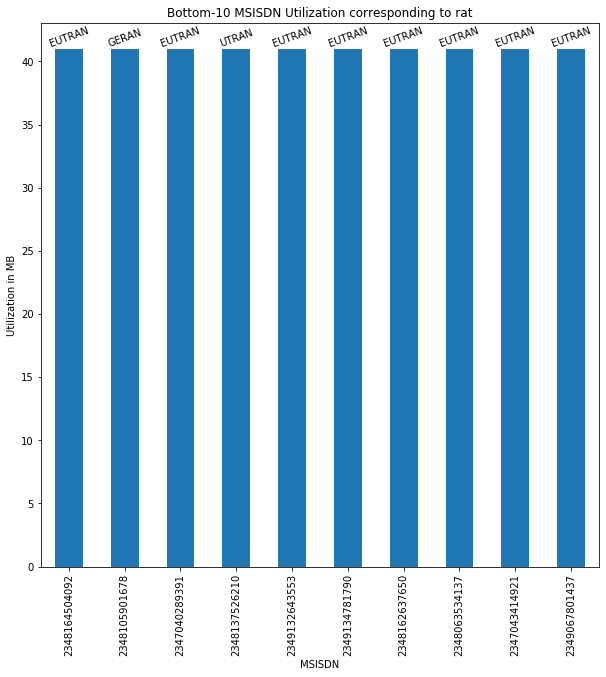

In [10]:
#Utilizing the Dataframe from Case2 above and Sorting the Downloaded data in Ascending order (Here Lowest comes at top) in MB
df_rat_msisdn_sorted_down = df_rat_msisdn.sort_values(['datavolume_GPRSDownlink'], ascending=True)
df_rat_msisdn_sorted_down_new = df_rat_msisdn_sorted_down[(df_rat_msisdn_sorted_down['datavolume_GPRSDownlink']>40)]
#Extracting least-10 MSISDN
df_rat_msisdn_sorted_down_10 = df_rat_msisdn_sorted_down_new.head(10)
#print("Least Usage subscribers corresponding to ratType are: \n",df_rat_msisdn_sorted_down_10)

#RAT value mapping to corresponding RAT
df_rat_msisdn_sorted_down_10.loc[df_rat_msisdn_sorted_down_10['ratType'] == 6, 'ratType'] = 'EUTRAN'
df_rat_msisdn_sorted_down_10.loc[df_rat_msisdn_sorted_down_10['ratType'] == 1, 'ratType'] = 'UTRAN'
df_rat_msisdn_sorted_down_10.loc[df_rat_msisdn_sorted_down_10['ratType'] == 2, 'ratType'] = 'GERAN'


#Plotting the required Data:
plt.figure(figsize=(10,10))
ax = df_rat_msisdn_sorted_down_10['datavolume_GPRSDownlink'].plot(kind="bar")
ax.set_title("Bottom-10 MSISDN Utilization corresponding to rat")
ax.set_xlabel("MSISDN")
ax.set_ylabel("Utilization in MB")
ax.set_xticklabels(df_rat_msisdn_sorted_down_10['ServedMSISDN'])
rects = ax.patches
for rect, label in zip(rects, df_rat_msisdn_sorted_down_10['ratType']):
    height = rect.get_height()
    ax.text(rect.get_x()+ rect.get_width()/2,height+0.2, label, ha="center", rotation=20) 
plt.show()

### Use Case 4: Top-10 LACs Data Utilization:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


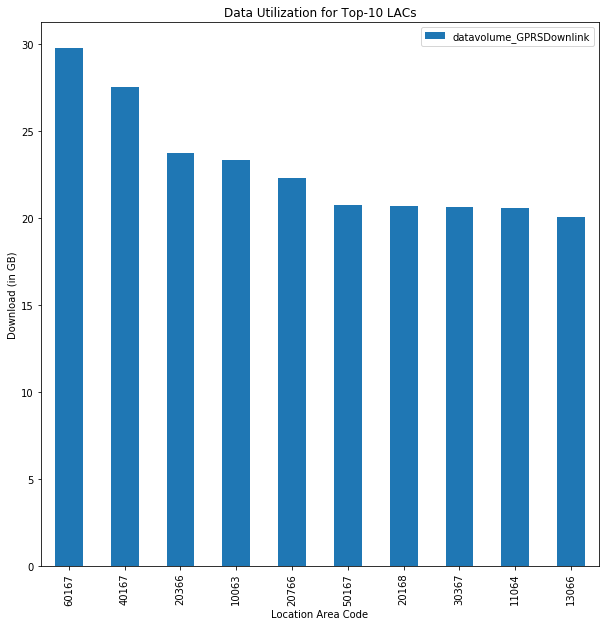

In [12]:
#Creating dataframe by applying groupby on required features:
df_lac = normalize_df.groupby(['LAC'])['datavolume_GPRSDownlink'].apply(lambda x : x.astype(float).sum())
df_lac = df_lac.reset_index()
#Sorting the Downloaded data in Descending order (Here highest comes at top) in GB
df_lac_sorted = df_lac.sort_values(['datavolume_GPRSDownlink'], ascending=False)
df_lac_sorted['datavolume_GPRSDownlink'] = df_lac_sorted['datavolume_GPRSDownlink'].div(1024*1024*1024).round(2)
#Extracting top-10 LACs and converting the datatype to integer
df_lac_top10 = df_lac_sorted.head(10)
df_lac_top10['LAC'] = df_lac_top10['LAC'].astype(int)

#Plotting the required data:
plt.rcParams['figure.figsize']= [10,10]
df_lac_top10.plot(x="LAC", y="datavolume_GPRSDownlink", kind="bar", title="Data Utilization for Top-10 LACs")
plt.xlabel("Location Area Code")
plt.ylabel("Download (in GB)")
plt.legend()
plt.show()

### Use Case 5: Least-10 LACs Data Utilization:

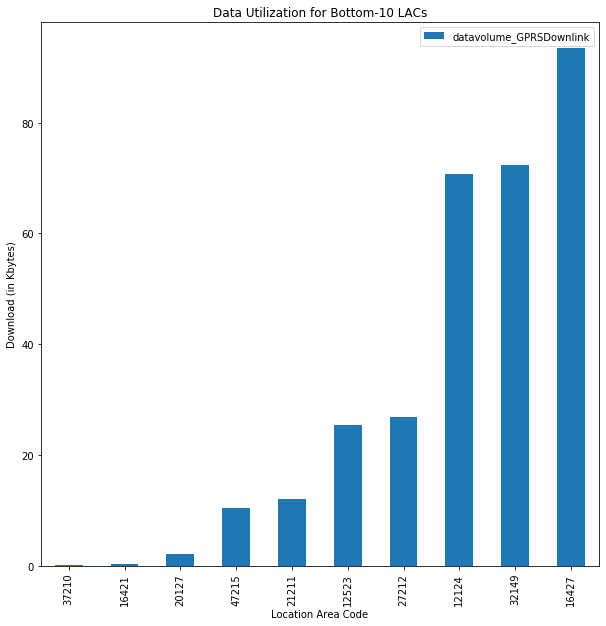

In [14]:
#Utilizing initial dataframe from case4 and Sorting the Downloaded data in Ascending order (Here lowest comes at top) in KBytes
df_lac_sorted_least = df_lac.sort_values(['datavolume_GPRSDownlink'], ascending=True)
df_lac_sorted_least_10 = df_lac_sorted_least[(df_lac_sorted_least['datavolume_GPRSDownlink']>40)].head(10)
df_lac_sorted_least_10['datavolume_GPRSDownlink'] = df_lac_sorted_least_10['datavolume_GPRSDownlink'].div(1024).round(2)
df_lac_sorted_least_10['LAC'] = df_lac_sorted_least_10['LAC'].astype(int)

#Plotting the required data:
plt.rcParams['figure.figsize']= [10,10]
df_lac_sorted_least_10.plot(x="LAC", y="datavolume_GPRSDownlink", kind="bar", title="Data Utilization for Bottom-10 LACs")
plt.xlabel("Location Area Code")
plt.ylabel("Download (in Kbytes)")
plt.legend()
plt.show()

### Use Case 6: Analysis on "Change Condition":

These are the Unique values for feature changecondition:
 ['qoSChange' 'recordClosure' 'failureHandlingTerminateOngoing']
Feature values and its occurance in the data:
                              index  ChangeCondition
0                    recordClosure           662001
1                        qoSChange           181036
2  failureHandlingTerminateOngoing               44


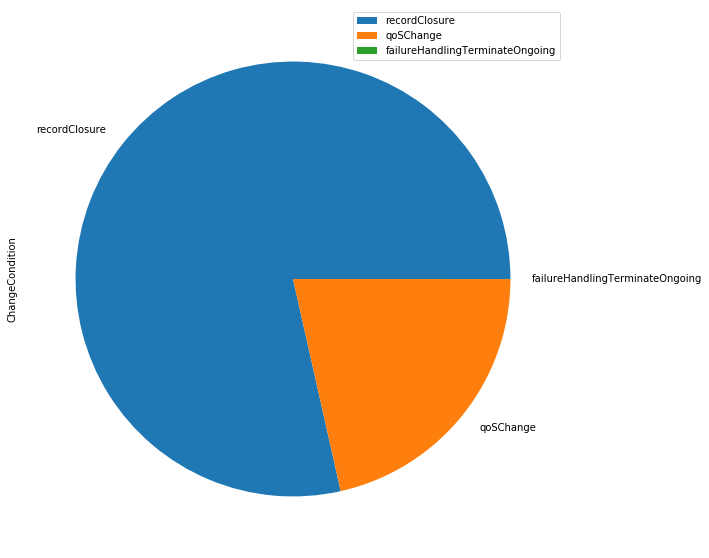

In [22]:
#Creating datframe from required features:
df_churn = pd.DataFrame({
    'ChangeCondition': normalize_df['changecondition'],
    'Cause_For_ReClosing': normalize_df['Cause_For_ReClosing']
})
print("These are the Unique values for feature changecondition:\n",df_churn.ChangeCondition.unique())

#Plotting a pie-chart based on the "ChangeCondition" feature and its presence in the data: 
df_pie = df_churn['ChangeCondition'].value_counts().to_frame()
df_pie = df_pie.reset_index()
print("Feature values and its occurance in the data:\n",df_pie)
df_pie.set_index('index', inplace=True)
df_pie.plot.pie(y='ChangeCondition', figsize=(10,10))

### Use Case 7: Analysis on "Cause_For_ReClosing":

These are the Unique values for feature Cause_For_ReClosing:
 ['rATChange' 'normalRelease' 'volumeLimit' 'timeLimit'
 'creditControlInitRelease']
Feature values and its occurance in the data:
                           Cause_For_ReClosing
index                                        
normalRelease                          477973
rATChange                              314258
volumeLimit                             25610
timeLimit                               25196
creditControlInitRelease                   44


<Figure size 720x720 with 0 Axes>

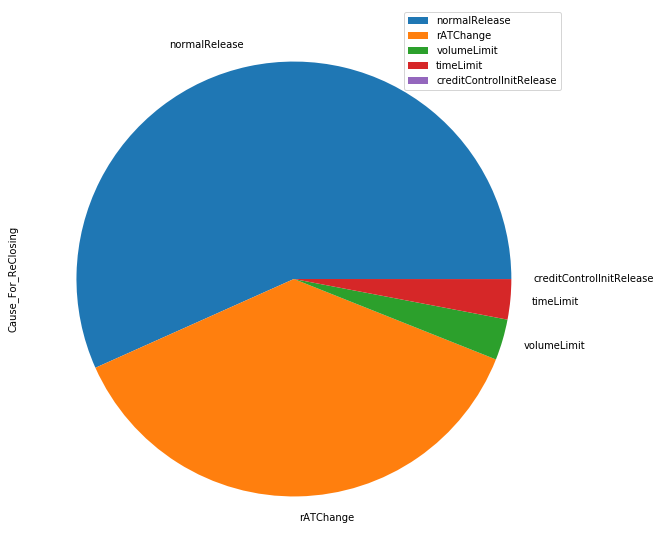

In [24]:
#Utilizing the dataframe in Case6 & plotting the pie-chart based onthe "Cause_For_ReClosing" feature ond its presence in the data:
df_pie_reclosing = df_churn['Cause_For_ReClosing'].value_counts().to_frame()
df_pie_reclosing = df_pie_reclosing.reset_index()
print("These are the Unique values for feature Cause_For_ReClosing:\n",df_churn.Cause_For_ReClosing.unique())

#Plotting the required data:
plt.tight_layout()
df_pie_reclosing.set_index('index', inplace=True)
print("Feature values and its occurance in the data:\n",df_pie_reclosing)
df_pie_reclosing.plot.pie(y='Cause_For_ReClosing', figsize=(10,10))